### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform


### Exploratory Data Analysis 

1 Loading data into data frame.

In [5]:
data = pd.read_csv('data/coupons.csv')

2 Investigate the dataset for missing or problematic data.


In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [7]:
datashape_befor = data.shape
# Drop duplicate  from the data set
data = data.drop_duplicates()
datashape_after = data.shape
Number_of_row_droped = tuple(map(lambda i, j: i - j, datashape_befor, datashape_after))
print("No removed duplicates:",(Number_of_row_droped ))
print("Shape of dataset after removing duplicates:",datashape_after)

No removed duplicates: (74, 0)
Shape of dataset after removing duplicates: (12610, 26)


In [8]:
# missing values
print('Is there any missing value present or not?',data.isnull().values.any())

Is there any missing value present or not? True


In [13]:
Missing_percentage = data.isnull().sum()*100/len(data)
Missng_count = data.isnull().sum()
missing_value_df = pd.DataFrame({'missing_count': Missng_count,'missing_percentage': Missing_percentage})
# print only attributs with missing values
missing_value_df[missing_value_df.missing_count != 0]

,missing_count,missing_percentage
car,12502,99.143537
Bar,107,0.848533
CoffeeHouse,217,1.720856
CarryAway,150,1.189532
RestaurantLessThan20,129,1.022998
Restaurant20To50,189,1.498810


After examining our data closely, we noticed that six features were missing values. Unfortunately, the label for "car" was practically nonexistent - 99% of its values could not be located which meant it had no impact on further predictions and therefore must be eliminated from the dataset before analysing can continue.

also for constancy other five features missing values be replased using fillna

 3 Lets Remove colums with missing data

In [14]:
data['Bar']=data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway']=data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50']=data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])
CleanData = data.drop(["car"], axis = 1)
CleanData.corr(method ='pearson',numeric_only=True)

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000


The results of the correlation analysis suggest leaving out 'toCoupon_GEQ5min' since all venues were at least five minutes away from users. 'direction_opp' was also found to be redundant, as it had an identical correlation report with attribute ‘direction_same’.

In [15]:
FinalData = CleanData.drop(["toCoupon_GEQ5min","direction_opp"], axis = 1)
FinalData.corr(method ='pearson',numeric_only=True)


,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
temperature,1.000000,-0.018599,-0.157089,-0.227165,0.097972,0.059393
has_children,-0.018599,1.000000,0.079434,-0.010773,-0.032353,-0.045056
toCoupon_GEQ15min,-0.157089,0.079434,1.000000,0.321260,-0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,0.321260,1.000000,-0.189900,-0.108139
direction_same,0.097972,-0.032353,-0.302066,-0.189900,1.000000,0.014932
Y,0.059393,-0.045056,-0.082693,-0.108139,0.014932,1.000000


4.	Distribution analysis 
Let’s find out % of Accepted and Rejected offers form total count.


In [16]:
Offer_staus_counts = FinalData.groupby('Y').Y.count()
Total_results = FinalData.shape[0]
print('Rejected coupon:', Offer_staus_counts [0],round(Offer_staus_counts [1]/ Total_results*100,0),'%')
print('Accepted coupon:', Offer_staus_counts [1],round(Offer_staus_counts [0]/ Total_results*100,0),'%')


Rejected coupon: 5453 57.0 %
Accepted coupon: 7157 43.0 %


This dataset is partially balanced with acceptance  are approx 57% and reject are approx 43%.

5. Use a bar plot to visualize the `coupon` column.

[Text(0.5, 1.0, 'coupons counts by type of coupon')]

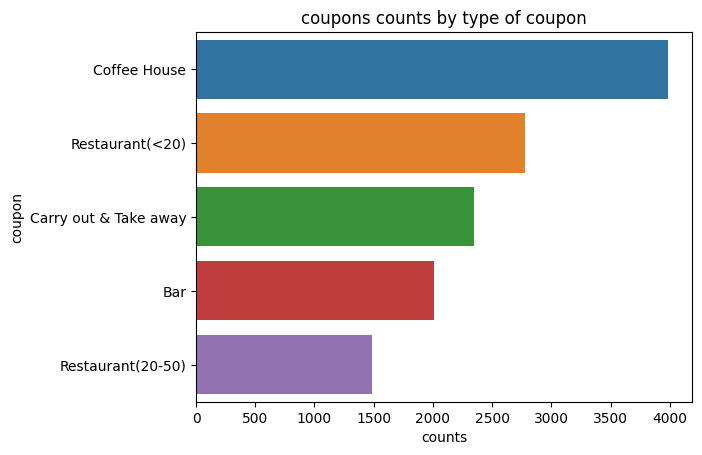

In [17]:
CouponData = FinalData.value_counts('coupon')
CouponData = CouponData.reset_index()
CouponData.columns = ['coupon', 'counts']

sns.barplot(data=CouponData, x="counts", y="coupon").set(title='coupons counts by type of coupon')


Our results demonstrate that Coffee coupons are faring better than high-end restaurants. Let's delve deeper into the success of coffee coupons and see what attributes 'Y' can attribute their effectivity to.

[Text(0.5, 1.0, 'Coffee coupons count by type of coupon and Acceptance')]

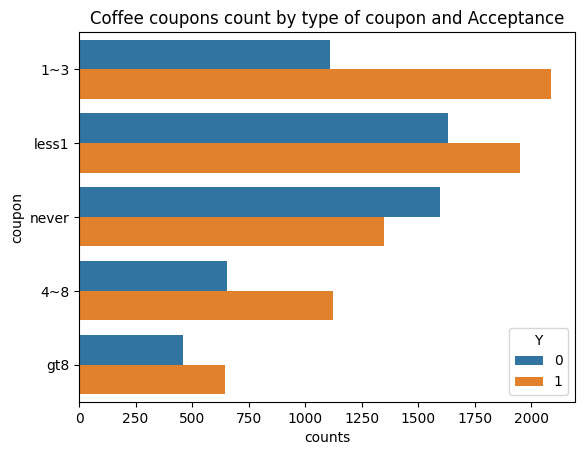

In [18]:

Coffee_Coupons_Y = FinalData[["CoffeeHouse","Y"]]
Coffee_Coupons_Y = Coffee_Coupons_Y.value_counts()
Coffee_Coupons_Y = Coffee_Coupons_Y.reset_index()
Coffee_Coupons_Y.columns = ['coupon','Y','counts']
Coffee_Coupons_Y
sns.barplot(data=Coffee_Coupons_Y, x="counts", y="coupon", hue= "Y" ) .set(title='Coffee coupons count by type of coupon and Acceptance')

Our results demonstrate that overe all Acceptance of Coffee coupons very good and Acceptance of the copupon is higerwith peopel thta visits 1-3 time the Coffee House
let us analyze further to see what effect  gender has  

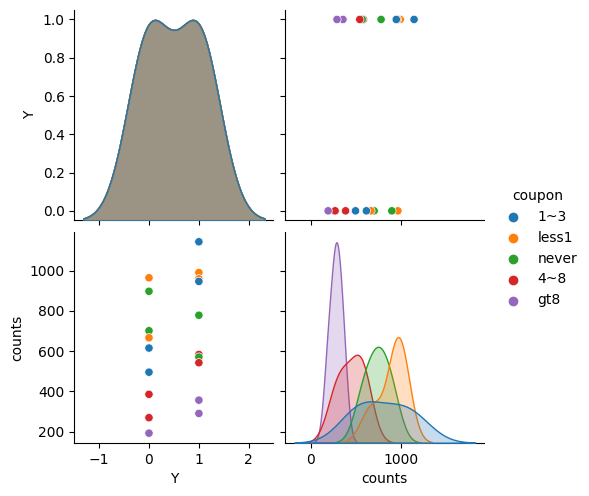

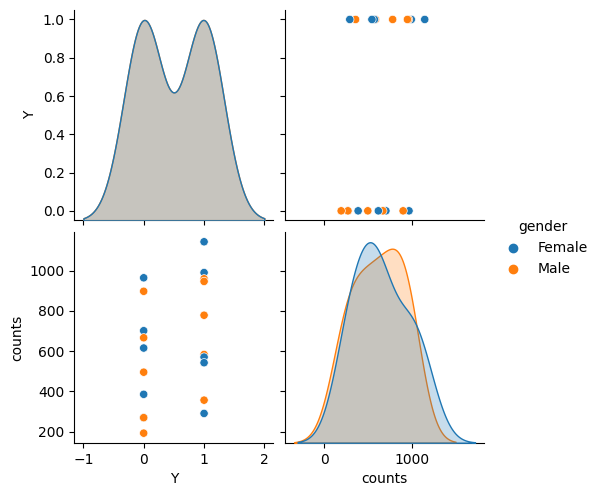

In [19]:
FinalData.head()
Coffee_Coupons_Mix = FinalData[["CoffeeHouse","Y","gender"]]
Coffee_Coupons_Mix = Coffee_Coupons_Mix.value_counts()
Coffee_Coupons_Mix = Coffee_Coupons_Mix.reset_index()
Coffee_Coupons_Mix.columns = ['coupon','Y','gender','counts']
sns.pairplot(Coffee_Coupons_Mix, hue='coupon', height=2.5);
sns.pairplot(Coffee_Coupons_Mix, hue='gender', height=2.5);



Our results demonstrate that females are most likly to Acceptance of Coffee coupons 

6. Use a histogram to visualize the temperature column.

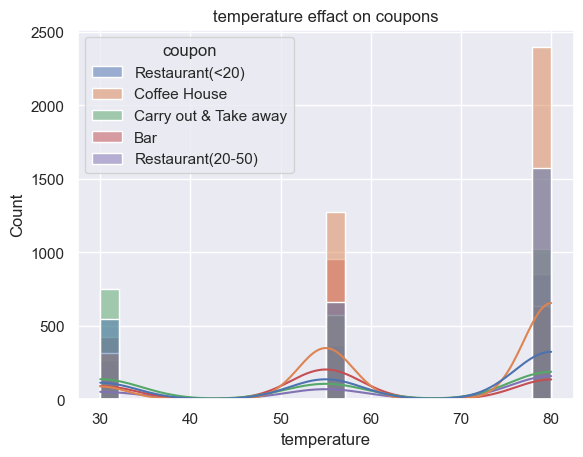

In [20]:
FinalData.head()
sns.set(style="darkgrid")
sns.histplot(data=FinalData, x="temperature", hue="coupon", kde=True).set(title='temperature effact on coupons')
plt.show()

The histogram shwos thta higer the temperature more people used the coupons 
lower the temperature more carry out and Take away 
mid range temperature you see uptake on coffee house, bar and restaurant  

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


2. What proportion of bar coupons were accepted?


In [22]:
Coupons = FinalData[["coupon","Y"]]
Coupons_count = Coupons.value_counts()
Coupons_count = Coupons_count.reset_index()
Coupons_count.columns = ['coupon','Y','counts']
total = Coupons_count[['counts']].sum(axis=0)
Coupons_count['%'] = Coupons_count['counts'] * 100/ total[0]
Coupons_count = Coupons_count.reset_index()
Coupons_count


,index,coupon,Y,counts,%
0,0,Coffee House,0,2000,15.860428
1,1,Coffee House,1,1989,15.773196
2,2,Restaurant(<20),1,1967,15.598731
3,3,Carry out & Take away,1,1720,13.639968
4,4,Bar,0,1186,9.405234
5,5,Restaurant(20-50),0,831,6.590008
6,6,Bar,1,824,6.534496
7,7,Restaurant(<20),0,812,6.439334
8,8,Restaurant(20-50),1,657,5.210151
9,9,Carry out & Take away,0,624,4.948454


Our results demonstrate that only accepted bar coupons are 6.5% of total coupons and not accepted bar coupons are 9.4% while almost equal amounts of coffee House coupons are accepted and rejected

[Text(0.5, 1.0, 'acceptance rate between coupons')]

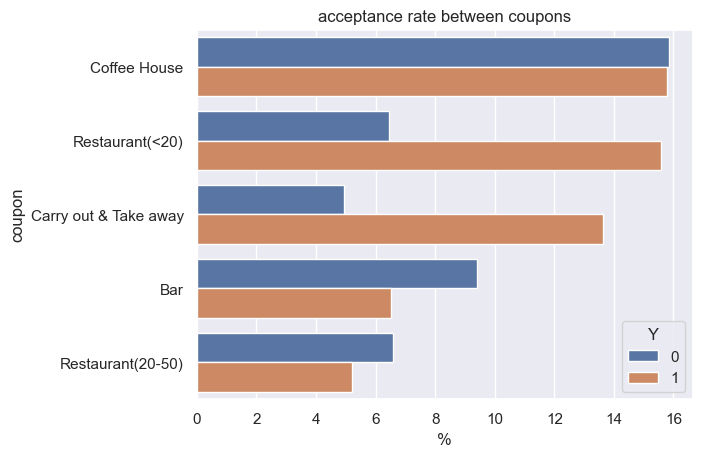

In [23]:
sns.barplot(data=Coupons_count, x= '%', y='coupon', hue= 'Y').set(title='acceptance rate between coupons')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:
Coupons_bar = FinalData[["coupon","Y","Bar"]]
Coupons_bar
#print(Coupons_bar["Bar"].unique())
barlist = ['never', 'less1', '1~3','gt8', '4~8']
Coupons_bar_3orLess = Coupons_bar.query('coupon == "Bar" ')
pd.set_option('mode.chained_assignment', None)
Coupons_bar_3orLess['BarArg'] = Coupons_bar_3orLess['Bar'].replace(['never', 'less1', '1~3','gt8', '4~8'], ['3orLess','3orLess','3orLess','MoreThen3','MoreThen3'])
Coupons_bar_3orLess1 = Coupons_bar_3orLess[["coupon","Y","BarArg"]]
Coupons_bar_3orLess_count = Coupons_bar_3orLess1.value_counts()
Coupons_bar_3orLess_count = Coupons_bar_3orLess_count.reset_index()
Coupons_bar_3orLess_count.columns= ['coupon','Y','counts','BarArg']
Coupons_bar_3orLess_count



,coupon,Y,counts,BarArg
0,Bar,0,3orLess,1140
1,Bar,1,3orLess,671
2,Bar,1,MoreThen3,153
3,Bar,0,MoreThen3,46


Our results demonstrate that accepted arte for MoreThen3 is higher then 3orLess this is becouse we included 'never' in 3 time or less

[Text(0.5, 1.0, 'Rate between those who went to a bar 3 or fewer times a month to those who went more')]

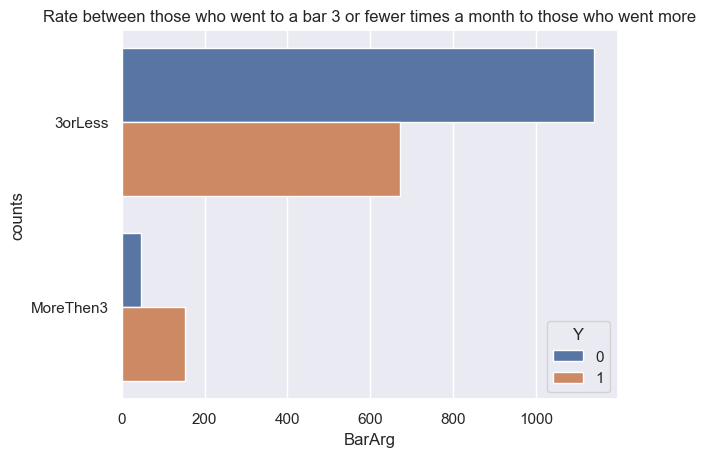

In [25]:
sns.barplot(data=Coupons_bar_3orLess_count, x= 'BarArg', y='counts', hue= 'Y').set(title='Rate between those who went to a bar 3 or fewer times a month to those who went more')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

[Text(0.5, 1.0, 'Rate between those who went to a bar 3 or fewer times a month to those who went more')]

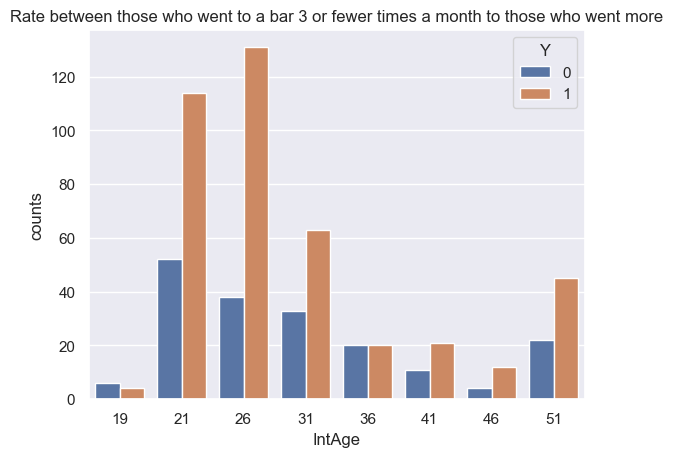

In [59]:
Coupons_bar4 = FinalData[["coupon","Y","Bar","age"]]
Coupons_bar4
#print(Coupons_bar4["Bar"].unique())
#print(Coupons_bar4["age"].unique())
Coupons_bar4['IntAge'] = Coupons_bar4['age'].replace(['50plus', 'below21'], ['51','19'])
#print(Coupons_bar4['age'])
Coupons_bar4 = Coupons_bar4.astype({'IntAge':'int'})
#print(Coupons_bar4['IntAge'])
Coupons_bar4 = Coupons_bar4[["coupon","Y","Bar","IntAge"]]
Barlist = [ '1~3','gt8', '4~8']
Coupons_bar4_1P25 = Coupons_bar4.query('coupon == "Bar" and Bar in @Barlist ')

Coupons_bar4_1P25  = Coupons_bar4_1P25[["coupon","Y","IntAge"]]
Coupons_bar4_1P25  = Coupons_bar4_1P25.value_counts()
Coupons_bar4_1P25  = Coupons_bar4_1P25.reset_index()
Coupons_bar4_1P25.columns= ['coupon','Y','IntAge','counts']
# print(Coupons_bar4_1P25['IntAge'] )
# print(Coupons_bar4["IntAge"].unique())
# print(Coupons_bar4_1P25["IntAge"].unique())
sns.barplot(data=Coupons_bar4_1P25, x= 'IntAge', y='counts', hue= 'Y').set(title='Rate between those who went to a bar 3 or fewer times a month to those who went more')


the result shows that age between 21 and 30 has higher acceptance rate and also ager 20 and 26 are more likely to accept coupnn for bar. It also shows thta 31 and 50+ croed is next in line to goto bar.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


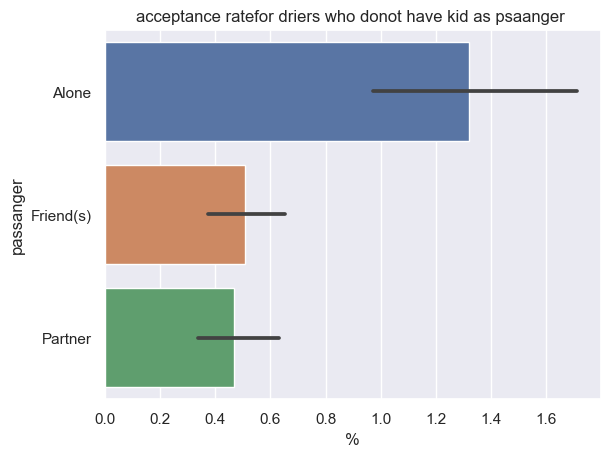

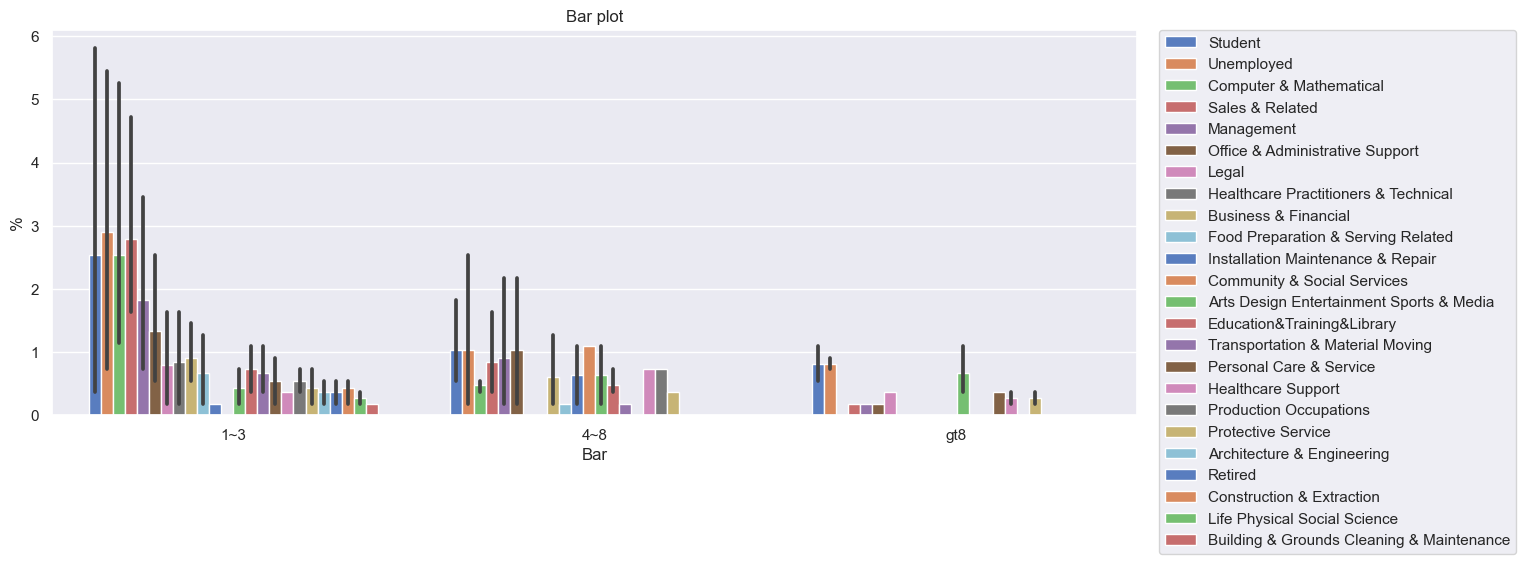

In [73]:
Coupons_bar5 = FinalData[["coupon","Bar","passanger","occupation"]]
Coupons_bar5
# print(Coupons_bar5["coupon"].unique())
# print(Coupons_bar5["Bar"].unique())
# print(Coupons_bar5["passanger"].unique())
# print(Coupons_bar5["occupation"].unique())
barlist = ["1~3","4~8","gt8"]
Occlist = ["farming","fishing","forestry"]
Passlist = ["Kid(s)"]

Coupons_bar5 = Coupons_bar5.query('coupon == "Bar" & passanger != "Kid(s)"  & (Bar in @barlist) & (occupation not in @Occlist) ')

Coupons_bar5 = Coupons_bar5.value_counts() 
#print(Coupons_bar5)
Coupons_bar5 = Coupons_bar5.reset_index()
Coupons_bar5.columns = ["coupon","Bar","passanger","occupation","sum"]
total = Coupons_bar5[['sum']].sum(axis=0)
Coupons_bar5['%'] = Coupons_bar5['sum'] * 100/ total[0]
sns.barplot(data=Coupons_bar5, x= '%', y='passanger').set(title='acceptance ratefor driers who donot have kid as psaanger ')
plt.figure(figsize=(14, 5))
sns.barplot(data=Coupons_bar5,
             x="Bar",
             y="%",
             hue="occupation",
             palette = "muted"
            ).set(title='acceptance drivers who do not have kid as psaanger go to bars more than once a month nd had occupations other than farming, fishing, or forestry. ')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Bar plot")
plt.show()


I struggled to figure out which plot to use to represent this data. But based on a quick analysis, drivers without passengers have a higher rate  

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

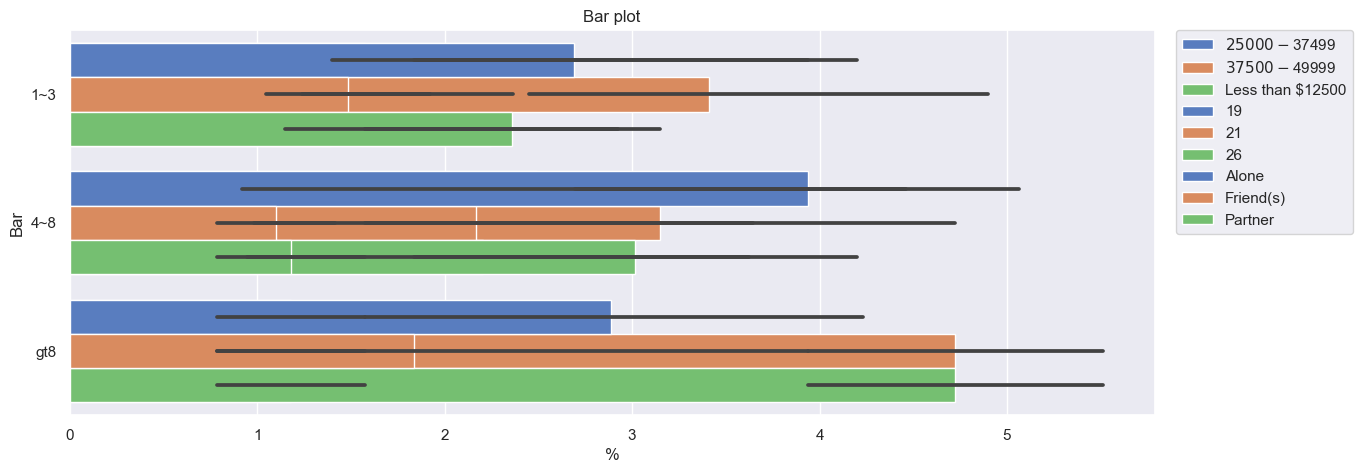

In [100]:
Coupons_bar6 = FinalData[["coupon","Bar","passanger","RestaurantLessThan20","income","age"]]
Coupons_bar6
# print(Coupons_bar5["coupon"].unique())
# print(Coupons_bar5["Bar"].unique())
# print(Coupons_bar5["passanger"].unique())
# print(Coupons_bar5["occupation"].unique())
barlist = ["1~3","4~8","gt8"]
incomlist = ['$37500 - $49999', 'Less than $12500','$25000 - $37499']
Passlist = ["Kid(s)","widowed"]
Coupons_bar6['IntAge'] = Coupons_bar6['age'].replace(['50plus', 'below21'], ['51','19'])
Coupons_bar6 = Coupons_bar6.astype({'IntAge':'int'})
Coupons_bar6 = Coupons_bar6[["coupon","Bar","passanger","RestaurantLessThan20","income","IntAge"]]

#Coupons_bar6 = Coupons_bar6.query( '(coupon == "Bar") & ((passanger not in @Passlist) & (Bar in @barlist)) | ((Bar in @barlist) & ( IntAge < 30 )) | ((income in @incomlist) & (RestaurantLessThan20 in @barlist)) ')
Coupons_bar6 = Coupons_bar6.query( '(coupon == "Bar") & ((passanger not in @Passlist) & (Bar in @barlist)) & ((Bar in @barlist) & ( IntAge < 30 )) & ((income in @incomlist) & (RestaurantLessThan20 in @barlist)) ')

Coupons_bar6.head()

Coupons_bar6 = Coupons_bar6.value_counts() 
Coupons_bar6 = Coupons_bar6.reset_index()
Coupons_bar6.columns = ["coupon","Bar","passanger","RestaurantLessThan20","income","IntAge","sum"]
total = Coupons_bar6[['sum']].sum(axis=0)
Coupons_bar6['%'] = Coupons_bar6['sum'] * 100/ total[0]
plt.figure(figsize=(14, 5))
sns.barplot(data=Coupons_bar6, x= '%', y='Bar',hue="income",palette = "muted")

sns.barplot(data=Coupons_bar6,
             x="%",
             y="Bar",
             hue="IntAge",
             palette = "muted"
            ).set(title='acceptance drivers who do not have kid as psaanger go to bars more than once a month nd had occupations other than farming, fishing, or forestry. ')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Bar plot")
sns.barplot(data=Coupons_bar6,
             x="%",
             y="Bar",
             hue="passanger",
             palette = "muted"
            ).set(title='acceptance drivers who do not have kid as psaanger go to bars more than once a month nd had occupations other than farming, fishing, or forestry. ')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Bar plot")
plt.show()

I struggled again to figure out which plot to use to represent this data. And I am lost and tired; I lost the code multiple times until I activated autosave. It is Sunday, and I have already worked for 30H on this assignment,
I will see tomorrow if I can complete the rest


Based on observations,we could hypothesize thta drivers who accepted the bar coupons are manly singel and age between 20-30?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Based on observations, Coffee House coupon may be the best bet, so let us find out provided profile and context when the driver is most likely to accept coffee coupons 

In [146]:
Coupons_bar7 = FinalData[["coupon","CoffeeHouse","passanger","toCoupon_GEQ15min","toCoupon_GEQ25min","income","age","weather","time","temperature","gender","Y"]]
# Coupons_bar7.info()
print(FinalData["coupon"].unique())
print(FinalData["toCoupon_GEQ15min"].unique())
print(FinalData["temperature"].unique())
# print(FinalData["occupation"].unique())

barlist = ["1~3","4~8","gt8"]
incomlist = ['$37500 - $49999', 'Less than $12500','$25000 - $37499']
Passlist = ["Kid(s)","widowed"]

Coupons_bar7['IntAge'] = Coupons_bar7['age'].replace(['50plus', 'below21'], ['51','19'])
Coupons_bar7 = Coupons_bar7.astype({'IntAge':'int'})

Coupons_bar7_Coffe_Age_Y = Coupons_bar7.query( '(coupon == "Coffee House") ')
Coupons_bar7_mean = Coupons_bar7_Coffe_Age_Y[["toCoupon_GEQ15min","toCoupon_GEQ25min","IntAge","temperature","Y"]].mean()
print(Coupons_bar7_mean) 



['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
[0 1]
[55 80 30]
toCoupon_GEQ15min     0.518927
toCoupon_GEQ25min     0.077714
IntAge               32.126849
temperature          68.035849
Y                     0.498621
dtype: float64


practically 51 % VS 7% of people took Coffee House coupons if they were in 15 min range
the temperature in the range of 65 to 70 and the age in the range  of 25 to 35 have the highest acceptance


Lst us look closely


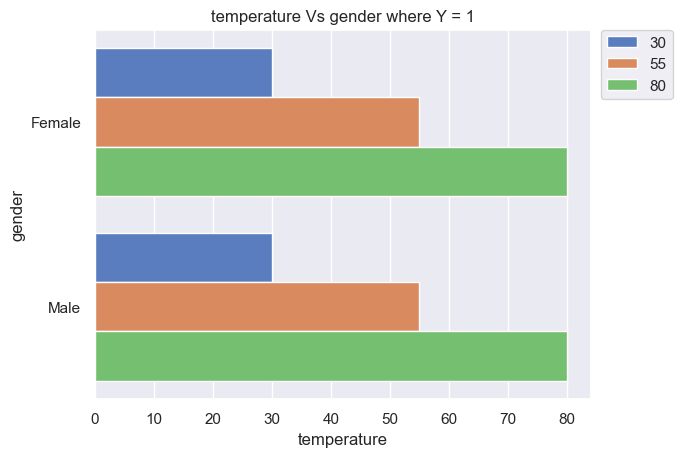

In [147]:
Coupons_bar7_Plot1 = Coupons_bar7.query( '(coupon == "Coffee House") & toCoupon_GEQ15min == 1 & Y == 1')
sns.barplot(data=Coupons_bar7_Plot1, x= 'temperature', y='gender',hue="temperature",palette = "muted")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("temperature Vs gender where Y = 1")
plt.show()
#lets find out the age group most likely to buy coffe

Based on observations, gender accepted coupons equally; the higher the temperature higher the acceptance

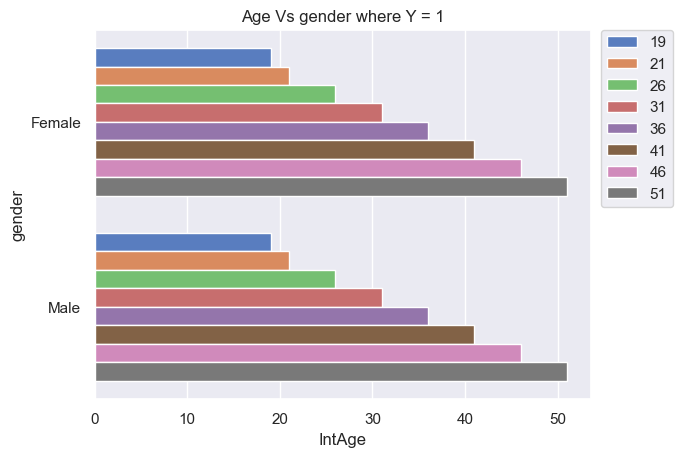

In [150]:
sns.barplot(data=Coupons_bar7_Coffe_Age_Y, x= 'IntAge', y= 'gender', hue="IntAge",palette = "muted")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Age Vs gender where Y = 1")
plt.show()

Based on the results, gender accepted coupons equally; the higher the age higher the acceptance

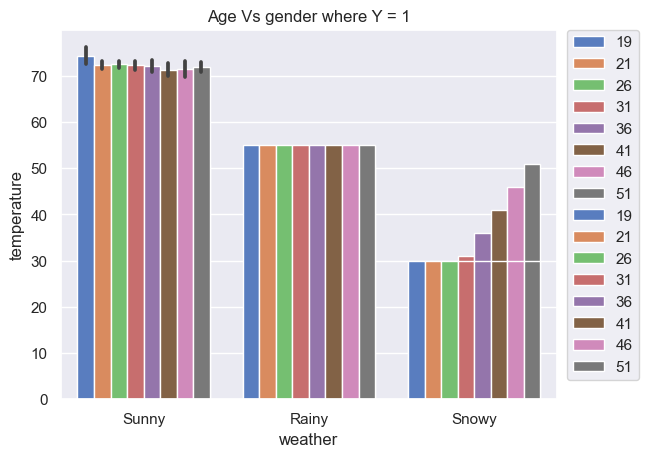

In [155]:
sns.barplot(data=Coupons_bar7_Coffe_Age_Y, x= 'weather', y= 'IntAge', hue="IntAge",palette = "muted")
sns.barplot(data=Coupons_bar7_Coffe_Age_Y, x= 'weather', y= 'temperature', hue="IntAge",palette = "muted")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Age Vs gender where Y = 1")
plt.show()

Based on the results, based on temperature and weather people over 36 most likly to accept when it is snowing. so Focue on age group > 35 when snowing and  balst equly when it sunny.

## The END ##
